### Computational Challenge 8 : Group 3 : 
### Group Members: Jayson, Manoj, Daniel, Mohammad:
### One-shot two-player Public Goods game:
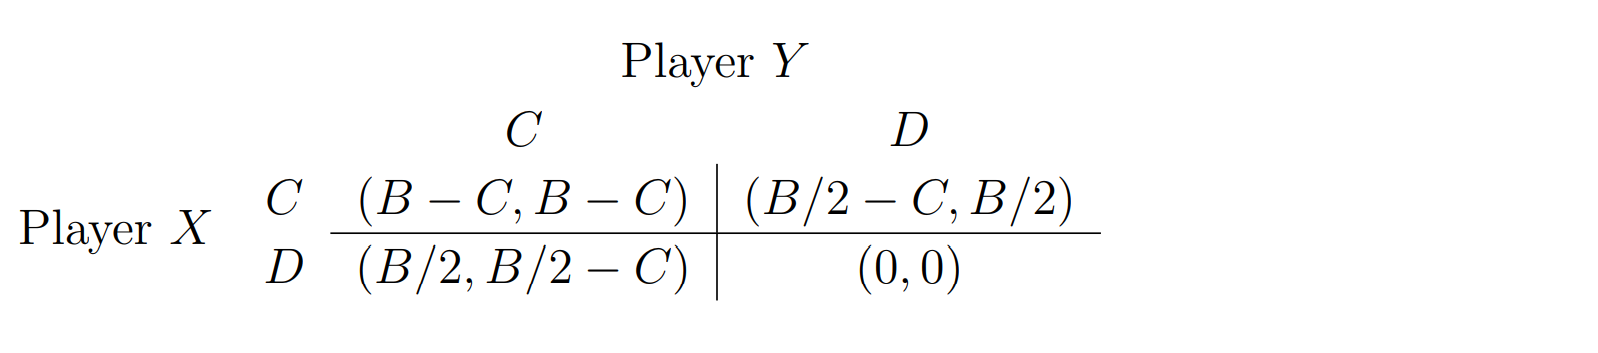

(a) When is this game a Prisoner's Dilemma? What is the Nash equilibrium for the one-shot game when it is not a Prisoner's Dilemma?

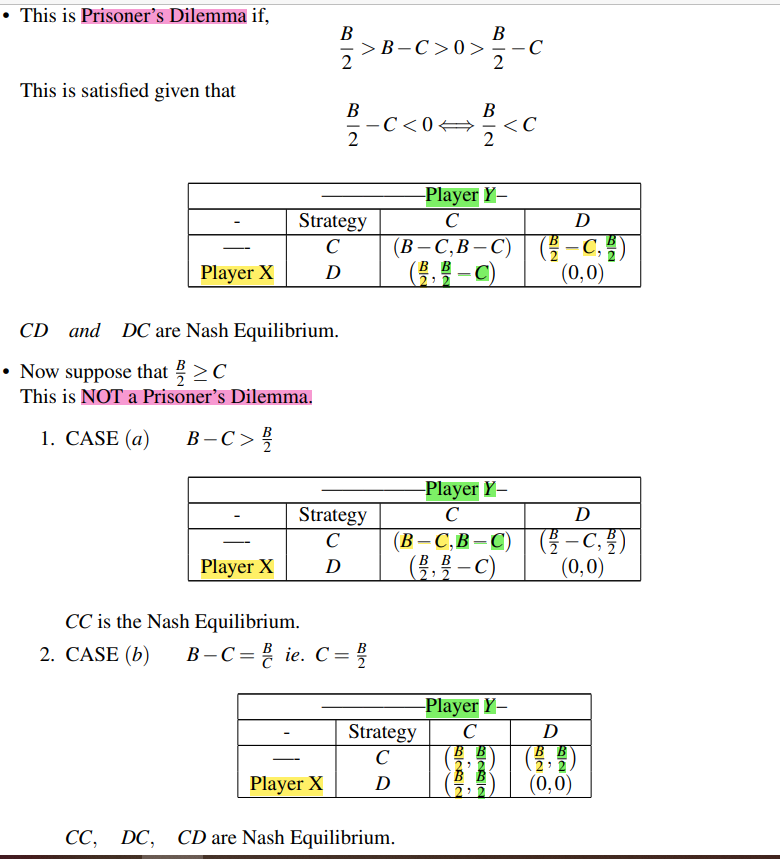

In [1]:
#This program performs an iterated matrix game with different strategy options.
import numpy as np
import matplotlib.pyplot as plt

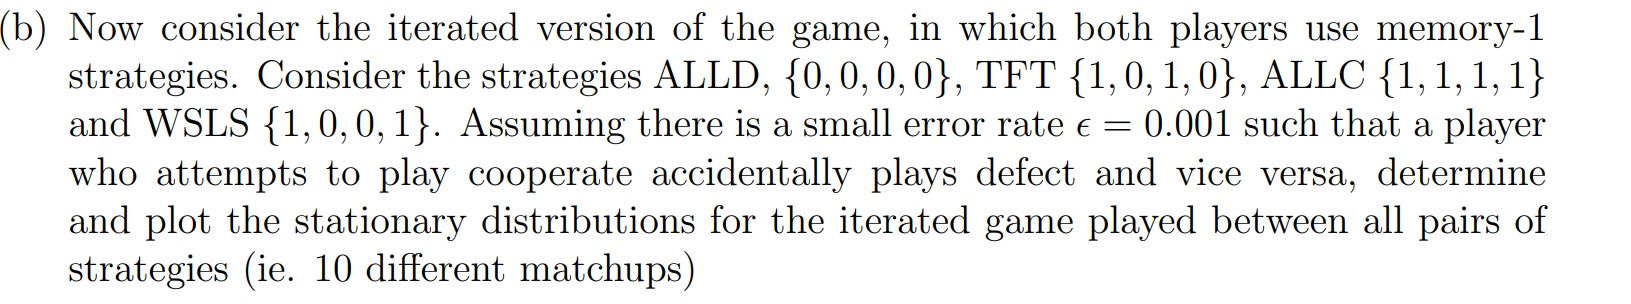

The transition matrix for the Markov chain describing the game is constrained but not uniquely
determined by each player’s strategy ( Taken from Lecture 22 notes)

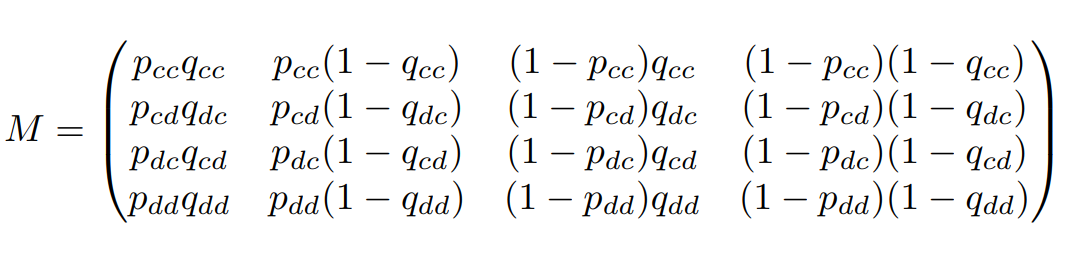

ALLD - Always defect:
ALLC - Always Cooperates:
TFC  - Tit for Tat:
WSLS - Win-stay Lose-shift:

In [2]:
def transition(strat,p1,p2):
    p=strat[p1,:]
    q=strat[p2,:]
    q_p=[q[0],q[2],q[1],q[3]]
    T=np.zeros([4,4])
    #row: cc==0 , cd==1, dc==2, dd==3
    for i in range(4):
        T[i,0]=p[i]*q_p[i]
        T[i,1]=p[i]*(1-q_p[i])
        T[i,2]=(1-p[i])*q_p[i]
        T[i,3]=(1-p[i])*(1-q_p[i])
    return T

def error(state,epsilon):
    state_matrix=np.array([[0,0],[0,1],[1,0],[1,1]])  #row/column: 0=='C'  1=='D'
    current=state_matrix[state,:]
    new=np.zeros(2)
    dummy=np.random.uniform(0,1,2)
    for i in range(2):
        if dummy[i]<epsilon:
            new[i]=(current[i]+1)%2
        else:
            new[i]=current[i]
    for i in range(4):
        diff=new-state_matrix[i,:]
        if diff[0]==0 and diff[1]==0:
            new_state=i
    return new_state

def initialize(p1,p2):
    state_matrix=np.array([[0,0],[0,1],[1,0],[1,1]])  #row/column: 0=='C'  1=='D'
    strat_vector=[p1,p2]
    cur_state=[0,0]
    for i in range(2):
        if strat_vector[i]==0:
            cur_state[i]=1
        else:  
            cur_state[i]=0
    for i in range(4):
        diff=cur_state-state_matrix[i,:]
        if diff[0]==0 and diff[1]==0:
            state=i
    return state

def simulate(T,strat,p1,p2,epsilon):
    state=initialize(p1,p2)
    P=transition(strat,p1,p2)
    for i in range(T):
        probsum=np.cumsum(P[state,:])
        dummy=np.random.uniform(0,1)
        if dummy<probsum[0]:
            temp_state=0             #[0,0]:=[C,C]
        elif dummy<probsum[1]:
            temp_state=1             #[0,1]:=[C,D]
        elif dummy<probsum[2]:
            temp_state=2             #[1,0]:=[D,C] 
        else:
            temp_state=3             #[1,1]:=[D,D]
        state=error(temp_state,epsilon)
    return state   

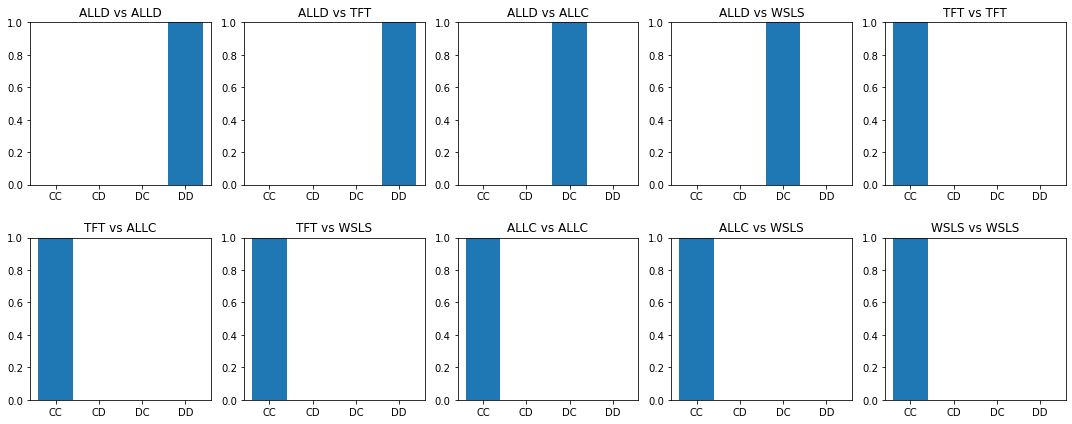

In [3]:
epsilon=0
strat=np.array([[0,0,0,0],[1,0,1,0],[1,1,1,1],[1,0,0,1]]) #row: ALLD==0, TFT==1, ALLC==2, WSLS==3
T=5000
repeats=500
p1=[0,0,0,0,1,1,1,2,2,3]
p2=[0,1,2,3,1,2,3,2,3,3]
tags=['ALLD','TFT','ALLC','WSLS']
heights=np.zeros([len(p1),4])
f,axes=plt.subplots(2,5,figsize=(15,6))
for j in range(len(p1)):
    for i in range(repeats):
        stationary=simulate(T,strat,p1[j],p2[j],epsilon)
        heights[j,int(stationary)]+=1
    if j<5:
        k=0
        h=j
    else:
        k=1
        h=j%5
    axes[k,h].bar([0,1,2,3],heights[j,:]/repeats) 
    axes[k,h].set_xticks(range(4))
    axes[k,h].set_xticklabels(['CC','CD','DC','DD'])
    axes[k,h].set_title('%s vs %s' %(tags[p1[j]],tags[p2[j]]))
    axes[k,h].set_ylim([0,1])
plt.tight_layout(h_pad=2,w_pad=1)

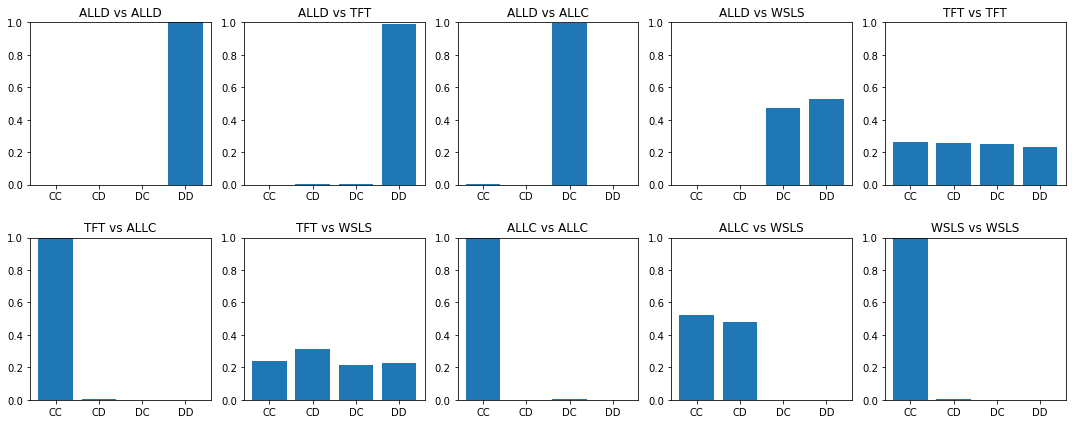

In [4]:
epsilon=0.001
strat=np.array([[0,0,0,0],[1,0,1,0],[1,1,1,1],[1,0,0,1]]) #row: ALLD==0, TFT==1, ALLC==2, WSLS==3
T=5000
repeats=500
p1=[0,0,0,0,1,1,1,2,2,3]
p2=[0,1,2,3,1,2,3,2,3,3]
tags=['ALLD','TFT','ALLC','WSLS']
heights=np.zeros([len(p1),4])
f,axes=plt.subplots(2,5,figsize=(15,6))
for j in range(len(p1)):
    for i in range(repeats):
        stationary=simulate(T,strat,p1[j],p2[j],epsilon)
        heights[j,int(stationary)]+=1
    if j<5:
        k=0
        h=j
    else:
        k=1
        h=j%5
    axes[k,h].bar([0,1,2,3],heights[j,:]/repeats) 
    axes[k,h].set_xticks(range(4))
    axes[k,h].set_xticklabels(['CC','CD','DC','DD'])
    axes[k,h].set_title('%s vs %s' %(tags[p1[j]],tags[p2[j]]))
    axes[k,h].set_ylim([0,1])
plt.tight_layout(h_pad=2,w_pad=1)

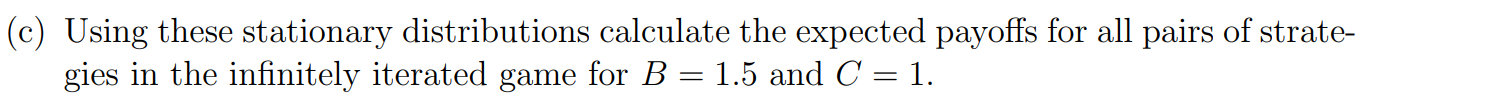

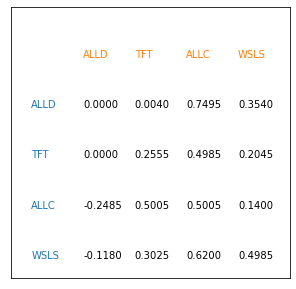

In [5]:
B=1.5
C=1
probs=heights/repeats
value=np.zeros([4,4])
for i in range(4):
    for j in range(4):
        for k in range(len(p1)):
            cond1=(i==p1[k] and j==p2[k])
            cond2=(i==p2[k] and j==p1[k])
            if cond1:  
                value[i,j]=(B-C)*probs[k,0]+((B/2)-C)*probs[k,1]+(B/2)*probs[k,2] 
            elif cond2:
                value[i,j]=(B-C)*probs[k,0]+((B/2)-C)*probs[k,2]+(B/2)*probs[k,1]
                
f=plt.figure(figsize=(5,5))
plt.xlim([13,40])
plt.ylim([13,40])
plt.xticks([])
plt.yticks([])
yy=[35, 30, 25, 20, 15]
xx=[15, 20, 25, 30, 35]
X,Y=np.meshgrid(xx,yy)
for j in range(len(xx)-1):
    for i in range(len(xx)-1):
        plt.text(X[i+1,j+1],Y[i+1,j+1],'%1.4f' %value[i,j])
for i in range(len(xx)-1):
    plt.text(xx[0],yy[i+1],tags[i],color='C0')
    plt.text(xx[i+1],yy[0],tags[i],color='C1')
plt.show()

In [ ]:
transition(strat,3,3)